# Instal Load and Package

In [ ]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot
!pip install shap
!pip install lime
!pip install dalex

     |████████████████████████████████| 106 kB 5.5 MB/s 
     |████████████████████████████████| 564 kB 5.3 MB/s 
     |████████████████████████████████| 275 kB 5.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=ddb0070f287e61504ef48a52a04c36d1c66a602463fdfaa83b7c95bad4d67766
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
     |████████████████████████████████| 1.0 MB 5.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for dalex: filename=dalex-1.4.1-py3-none-any.whl size=1042860 sha256=6a738b19a74a26a14b93984adcbe8fc11f077150d64aa3a9cfae58767c1e1f15
  Stored in directory: /root/.cache/pip/wheels/8c/8e/1b/95d59374d386e8e495aed6cbab4c4b6d72be73993a424c5e12
Successfully built dalex
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERRO

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import warnings
warnings.filterwarnings('ignore')

# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot, seaborn, and plotly.express module for data visualization
import matplotlib.pyplot as plt
palette = {0: 'tab:blue',1: 'tab:orange'}
import seaborn as sns
import plotly.express as px

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# load tree visualization
from sklearn.tree import plot_tree, export_text
# load metrics
from sklearn.metrics import *
# load grid search
from sklearn.model_selection import GridSearchCV

# import xgboost classifier
from xgboost import XGBClassifier

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# load preprocessing module
from sklearn.preprocessing import *

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

from sklearn.impute import SimpleImputer

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 

# import dalex to explain complex model
import dalex as dx

# Load Dataset

In [ ]:
# load insurance fraud dataset
insurance_fraud = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/car_insurance_fraud_dataset/insuranceFraud.csv")
insurance_fraud

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       10/17/2014           OH   
1                   228   42         342868        6/27/2006           IN   
2                   134   29         687698         9/6/2000           OH   
3                   256   41         227811        5/25/1990           IL   
4                   228   44         367455         6/6/2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851        7/16/1991           OH   
996                 285   41         186934         1/5/2014           IL   
997                 130   34         918516        2/17/2003           OH   
998                 458   62         533940       11/18/2011           IL   
999                 456   60         556080       11/11/1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

# Data Inspection

In [ ]:
# check data structure and its types
insurance_fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [ ]:
# check data dimension
insurance_fraud.shape

(1000, 39)

In [ ]:
# check null values inside dataset
insurance_fraud.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [ ]:
# Delete variable that not relevan
data = insurance_fraud.drop(['age','policy_bind_date','policy_state','policy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','collision_type','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved','auto_make','auto_model'],axis=1)
data.columns

Index(['months_as_customer', 'policy_number', 'capital-gains', 'capital-loss',
       'incident_type', 'incident_severity', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
# transform certain column into new column
fraud = data['fraud_reported'].apply(lambda x: 1 if x == "Y" else 0)
police = data['police_report_available'].apply(lambda x: 1 if x == "YES" else 0)
damage_property = data['property_damage'].apply(lambda x: 1 if x == "YES" else 0)
data['Fraud_Reported'] = fraud
data['police_report_avail'] = police
data['damage_property'] = damage_property
data

months_as_customer  policy_number  capital-gains  capital-loss  \
0                   328         521585          53300             0   
1                   228         342868              0             0   
2                   134         687698          35100             0   
3                   256         227811          48900        -62400   
4                   228         367455          66000        -46000   
..                  ...            ...            ...           ...   
995                   3         941851              0             0   
996                 285         186934          70900             0   
997                 130         918516          35100             0   
998                 458         533940              0             0   
999                 456         556080              0             0   

                incident_type incident_severity property_damage  \
0    Single Vehicle Collision      Major Damage             YES   
1               Vehicle Theft      Minor Damage               ?   
2     Multi-vehicle Collision      Minor Damage              NO   
3    Single Vehicle Collision      Major Damage               ?   
4               Vehicle Theft      Minor Damage              NO   
..                        ...               ...             ...   
995  Single Vehicle Collision      Minor Damage             YES   
996  Single Vehicle Collision      Major Damage             YES   
997   Multi-vehicle Collision      Minor Damage               ?   
998  Single Vehicle Collision      Major Damage               ?   
999                Parked Car      Minor Damage               ?   

     bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                  1          2                     YES               71610   
1                  0          0                       ?                5070   
2                  2          3                      NO               34650   
3                  1          2                      NO               63400   
4                  0          1                      NO                6500   
..               ...        ...                     ...                 ...   
995                0          1                       ?               87200   
996                2          3                       ?              108480   
997                2          3                     YES               67500   
998                0          1                     YES               46980   
999                0          3                       ?                5060   

     injury_claim  property_claim  vehicle_claim  auto_year fraud_reported  \
0            6510           13020          52080       2004              Y   
1             780             780           3510       2007              Y   
2            7700            3850          23100       2007              N   
3            6340            6340          50720       2014              Y   
4            1300             650           4550       2009              N   
..            ...             ...            ...        ...            ...   
995         17440            8720          61040       2006              N   
996         18080           18080          72320       2015              N   
997          7500            7500          52500       1996              N   
998          5220            5220          36540       1998              N   
999           460             920           3680       2007              N   

     Fraud_Reported  police_report_avail  damage_property  
0                 1                    1                1  
1                 1                    0                0  
2                 0                    0                0  
3                 1                    0                0  
4                 0                    0                0  
..              ...                  ...              ...  
995               0                    0 

In [ ]:
# Delete variable redundant
df = data.drop(['police_report_available','fraud_reported','property_damage','policy_number'],axis=1)
df

months_as_customer  capital-gains  capital-loss  \
0                   328          53300             0   
1                   228              0             0   
2                   134          35100             0   
3                   256          48900        -62400   
4                   228          66000        -46000   
..                  ...            ...           ...   
995                   3              0             0   
996                 285          70900             0   
997                 130          35100             0   
998                 458              0             0   
999                 456              0             0   

                incident_type incident_severity  bodily_injuries  witnesses  \
0    Single Vehicle Collision      Major Damage                1          2   
1               Vehicle Theft      Minor Damage                0          0   
2     Multi-vehicle Collision      Minor Damage                2          3   
3    Single Vehicle Collision      Major Damage                1          2   
4               Vehicle Theft      Minor Damage                0          1   
..                        ...               ...              ...        ...   
995  Single Vehicle Collision      Minor Damage                0          1   
996  Single Vehicle Collision      Major Damage                2          3   
997   Multi-vehicle Collision      Minor Damage                2          3   
998  Single Vehicle Collision      Major Damage                0          1   
999                Parked Car      Minor Damage                0          3   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_year  Fraud_Reported  police_report_avail  damage_property  
0         2004               1                    1                1  
1         2007               1                    0                0  
2         2007               0                    0                0  
3         2014               1                    0                0  
4         2009               0                    0                0  
..         ...             ...                  ...              ...  
995       2006               0                    0                1  
996       2015               0                    0                1  
997       1996               0                    1                0  
998       1998               0                    1                0  
999       2007               0                    0                0  

[1000 rows x 15 columns]

# Simple EDA

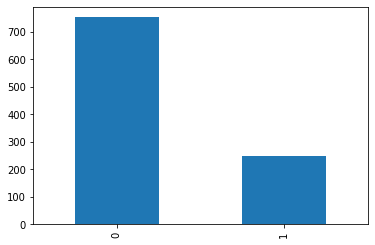

In [ ]:
# check target class distribution
df['Fraud_Reported'].value_counts().plot(kind = 'bar')

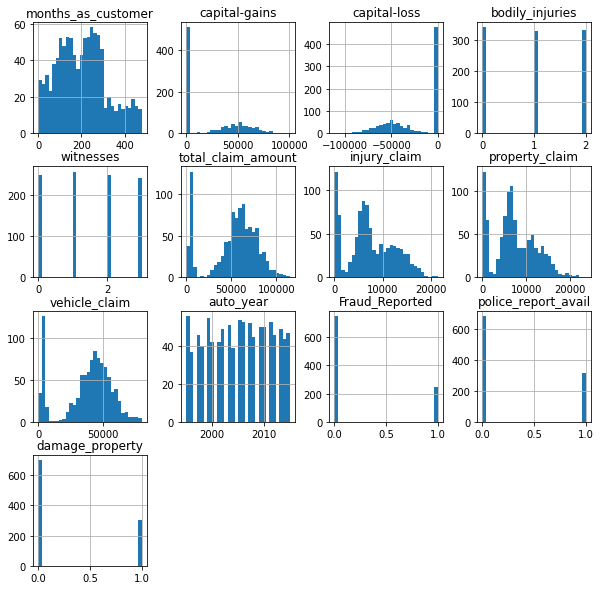

In [ ]:
# check numerical data distribution
df.hist(bins=30, figsize = (10, 10));

# Train-Test Split Data

In [ ]:
# cretate predictor variables as X
X = df.drop(['Fraud_Reported'], axis = 1)
# create target data as y
y = df['Fraud_Reported']

In [ ]:
# split data to train and test data
# where 30% of fraud reported are test data
# stratify data based on y varibales
# and freeze RNG with random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3,
    stratify = y, 
    random_state=1000
)

In [ ]:
# check train data dimension
X_train.shape

(700, 14)

In [ ]:
# check test data dimension
X_test.shape

(300, 14)

In [ ]:
# check train target counts
y_train.value_counts()

0    527
1    173
Name: Fraud_Reported, dtype: int64

In [ ]:
# check test target counts
y_test.value_counts()

0    226
1     74
Name: Fraud_Reported, dtype: int64

# EDA

In [ ]:
# create correlation matrix
X_train.corr()

months_as_customer  capital-gains  capital-loss  \
months_as_customer             1.000000       0.019551      0.022955   
capital-gains                  0.019551       1.000000     -0.034257   
capital-loss                   0.022955      -0.034257      1.000000   
bodily_injuries               -0.012758       0.071824     -0.009646   
witnesses                      0.029554      -0.026790     -0.014428   
total_claim_amount             0.031927       0.034051     -0.002512   
injury_claim                   0.022135       0.032560     -0.020585   
property_claim                 0.008416       0.017477      0.023309   
vehicle_claim                  0.036774       0.034766     -0.004204   
auto_year                     -0.037010       0.015983     -0.065288   
police_report_avail           -0.008353      -0.021406      0.013948   
damage_property                0.003113      -0.007929     -0.002715   

                     bodily_injuries  witnesses  total_claim_amount  \
months_as_customer         -0.012758   0.029554            0.031927   
capital-gains               0.071824  -0.026790            0.034051   
capital-loss               -0.009646  -0.014428           -0.002512   
bodily_injuries             1.000000  -0.000741            0.020380   
witnesses                  -0.000741   1.000000           -0.023249   
total_claim_amount          0.020380  -0.023249            1.000000   
injury_claim                0.043197  -0.043843            0.802773   
property_claim              0.003020   0.048261            0.814757   
vehicle_claim               0.016655  -0.033589            0.983168   
auto_year                  -0.058782   0.058594           -0.047811   
police_report_avail        -0.003455   0.078846            0.054989   
damage_property            -0.022423  -0.008943            0.078555   

                     injury_claim  property_claim  vehicle_claim  auto_year  \
months_as_customer       0.022135        0.008416       0.036774  -0.037010   
capital-gains            0.032560        0.017477       0.034766   0.015983   
capital-loss            -0.020585        0.023309      -0.004204  -0.065288   
bodily_injuries          0.043197        0.003020       0.016655  -0.058782   
witnesses               -0.043843        0.048261      -0.033589   0.058594   
total_claim_amount       0.802773        0.814757       0.983168  -0.047811   
injury_claim             1.000000        0.564280       0.721424  -0.027769   
property_claim           0.564280        1.000000       0.738127  -0.009910   
vehicle_claim            0.721424        0.738127       1.000000  -0.057131   
auto_year               -0.027769       -0.009910      -0.057131   1.000000   
police_report_avail      0.045099        0.024178       0.059085   0.005680   
damage_property          0.065271        0.040910       0.082565  -0.016965   

                     police_report_avail  damage_property  
months_as_customer             -0.008353         0.003113  
capital-gains                  -0.021406        -0.007929  
capital-loss                    0.013948        -0.002715  
bodily_injuries                -0.003455        -0.022423  
witnesses                       0.078846        -0.008943  
total_claim_amount              0.054989         0.078555  
injury_claim                    0.045099         0.065271  
property_claim                  0.024178         0.040910  
vehicle_claim                   0.059085         0.082565  
auto_year                       0.005680        -0.016965  
police_report_avail             1.000000        -0.060301  
damage_property                -0.060301         1.000000

In [ ]:
# pull numerical column
var_name = X_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

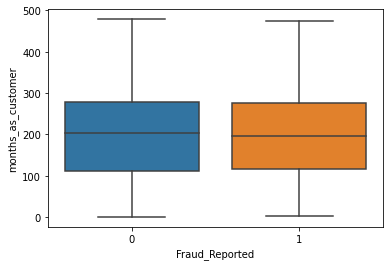

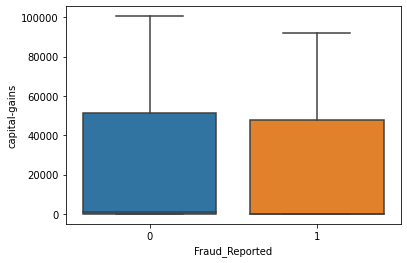

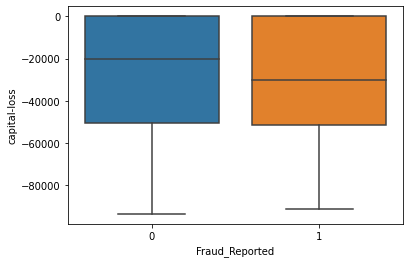

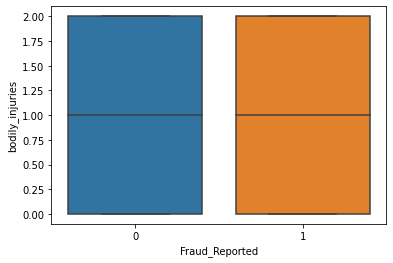

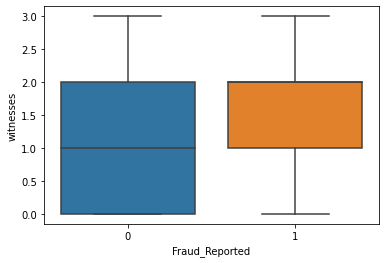

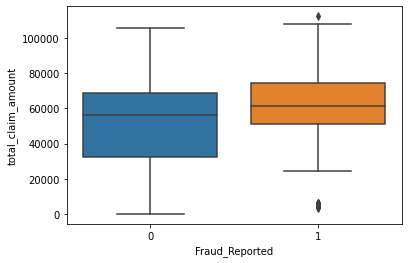

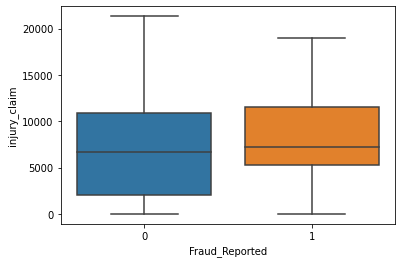

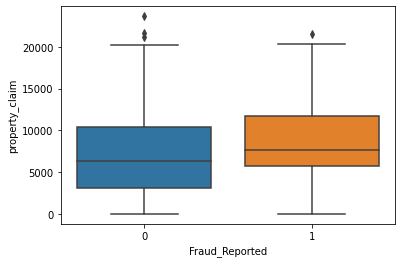

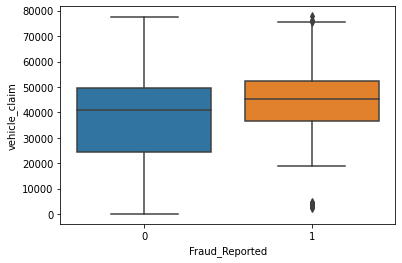

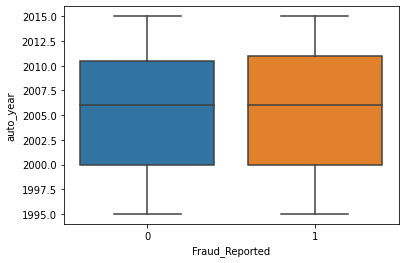

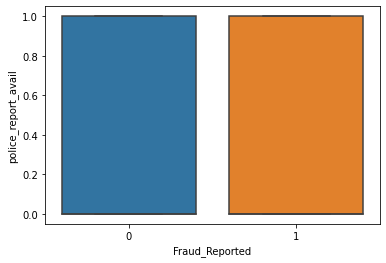

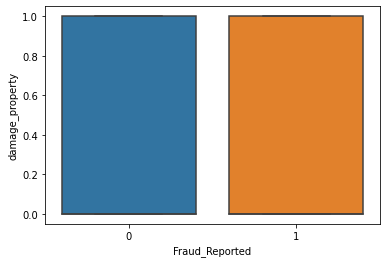

In [ ]:
# plot box plot
for col_names in var_name:
  plt.figure()
  sns.boxplot(x = y_train, y = X_train[col_names]);

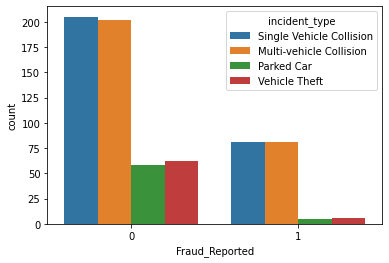

In [ ]:
# visualize correlation between 'Fraud_Reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "Fraud_Reported",
    hue = "incident_type"
);

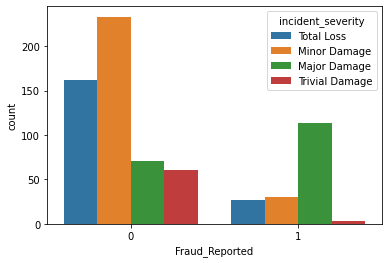

In [ ]:
# visualize correlation between 'Fraud_Reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "Fraud_Reported",
    hue = "incident_severity"
);

In [ ]:
# drop certain column on train data
column_to_drop = ['incident_severity', 'incident_type','total_claim_amount']
X_train = X_train.drop(column_to_drop, axis = 1)

# drop certain column in test data
X_test = X_test.drop(column_to_drop, axis = 1)

# Test Model with Hyperparameter Tuning

## Logistic Regression

In [ ]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train, y_train)

LogisticRegression(random_state=1000)

In [ ]:
# Logistic Regression
logreg = LogisticRegression(random_state=1000)

# Logreg params
logreg_params = {
    'penalty': ['elasticnet', 'l2'],
    'fit_intercept': [True, False],
    'C': [0.25, 0.5, 0.75, 1.0]
}

# define model with GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg, 
    param_grid=logreg_params, 
    n_jobs=1, 
    verbose=1,
    cv = 5,
    scoring = "f1"
)

# fitting gridsearch
grid_search.fit(X_train, y_train)

# check the best estimator
grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


LogisticRegression(C=0.25, random_state=1000)

## KNN Model

In [ ]:
# K Nearest Neighbors
knn = KNeighborsClassifier()

# knn params
knn_params = {
    'n_neighbors': [2,3,4,5],
    'p': [1, 2]
}

# define model with GridSearchCV
grid_search = GridSearchCV(
    estimator=knn, 
    param_grid=knn_params, 
    n_jobs=1, 
    verbose=1,
    cv = 5,
    scoring = "f1"
)

# fitting gridsearch
grid_search.fit(X_train, y_train)

# check the best estimator
grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


KNeighborsClassifier(n_neighbors=3)

## Random Forest

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=1000)

# rf_params
rf_params = {
    'n_estimators': [10, 50, 100, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,10,'None'],
    'max_features': ['sqrt', 'log2']
}

# define model with GridSearchCV
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=rf_params, 
    n_jobs=1, 
    verbose=1,
    cv = 5,
    scoring = "f1"
)

# fitting gridsearch
grid_search.fit(X_train, y_train)

# check the best estimator
grid_search.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=10,
                       random_state=1000)

## XGboost

In [ ]:
# XGBoost
xgb = XGBClassifier(random_state=1000)

# xgb_params
xgb_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3,5,10,'None'],
    'learning_rate': [0.1, 0.05, 0.01],
    'grow_policy': ['depthwise', 'lossguide']
}

# define model with GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=xgb_params, 
    n_jobs=1, 
    verbose=1,
    cv = 5,
    scoring = "f1"
)

# fitting gridsearch
grid_search.fit(X_train, y_train)

# check the best estimator
grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


XGBClassifier(grow_policy='depthwise', max_depth=10, random_state=1000)

Model Selection

In [ ]:
def create_models(seed=1000):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('Logistic Regression', LogisticRegression(random_state=1000, fit_intercept=False)))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=3, p=1)))
    models.append(('Random Forest', RandomForestClassifier(random_state = 1000, max_depth=10, max_features='sqrt', n_estimators=10)))
    models.append(('XGBoost', XGBClassifier(random_state = 1000, grow_policy='depthwise', learning_rate=0.01, max_depth=10, n_estimators=10)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [ ]:
# test the F1 Score of each model using default hyperparameters
results = []
names = []
scoring = 'F1 Score'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate f1_score 
    f1score = f1_score(y_test, predictions)
    # append the model name and the F1 Score to the lists
    results.append(f1score)
    names.append(name)
    # print classifier F1 Score
    print('Classifier: {}, F1 Score: {})'.format(name, f1score))

Classifier: Logistic Regression, F1 Score: 0.026315789473684213)
Classifier: KNN, F1 Score: 0.20967741935483875)
Classifier: Random Forest, F1 Score: 0.08695652173913043)
Classifier: XGBoost, F1 Score: 0.12173913043478261)


In [ ]:
for name,model in models:
  model.fit(X_train, y_train).predict(X_test)
  predictions = model.predict(X_test)
  print('='*75)
  print('Classifier: {}'.format(name))
  print(pd.DataFrame(metrics.classification_report(y_test, predictions, target_names=['not fraud','fraud'], output_dict=True)))

Classifier: Logistic Regression
            not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.755034   0.500000  0.753333    0.627517      0.692125
recall       0.995575   0.013514  0.753333    0.504544      0.753333
f1-score     0.858779   0.026316  0.753333    0.442547      0.653438
support    226.000000  74.000000  0.753333  300.000000    300.000000
Classifier: KNN
            not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.756000   0.260000  0.673333    0.508000      0.633653
recall       0.836283   0.175676  0.673333    0.505979      0.673333
f1-score     0.794118   0.209677  0.673333    0.501898      0.649956
support    226.000000  74.000000  0.673333  300.000000    300.000000
Classifier: Random Forest
            not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.751773   0.222222      0.72    0.486998      0.621151
recall       0.938053   0.054054      0.72    0.496054      0.720000
f1-score     0.834646   0.086

The highest F1 Score is Logistic Regression models (26,31%). But, there is imbalance problem at we look in the other metrics. So we need to improve the model using G-Means.

# Modelling

In [ ]:
# define Logistic Reg model
log = LogisticRegression(random_state=1000,fit_intercept=False)

# fit model to data
log.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, random_state=1000)

### Model Evaluation

In [ ]:
# predict
pred_result = log.predict(X_test)
pred_proba_result = log.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not fraud','fraud'], output_dict=True))

not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.755034   0.500000  0.753333    0.627517      0.692125
recall       0.995575   0.013514  0.753333    0.504544      0.753333
f1-score     0.858779   0.026316  0.753333    0.442547      0.653438
support    226.000000  74.000000  0.753333  300.000000    300.000000

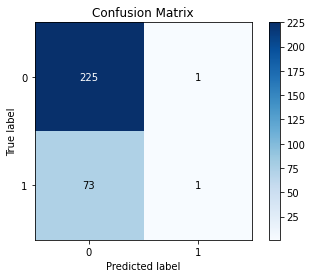

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

The confusion matrix show :

* The model predicted fraud and the insured actually fraud is 1 (True Positive)
* The model predicted not fraud and the insured actually fraud is 73 (False Negative)
* The model predicted fraud and the insured actually not fraud is 1 (False Positive)
* The model predicted not fraud and the insured actually not fraud is 225 (True Negative)

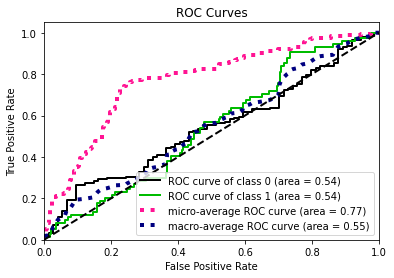

In [ ]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

The model succeed to distinct between True Positive and True Negative with chance 55%

In [ ]:
# check f1-score
metrics.f1_score(y_test, pred_result)

0.026315789473684213

The harmony between precision and recall score of the best model is 26,31%

### Imbalance Solve using G-Means

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.2540554506130729, G-Mean=0.5443717373045616


In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

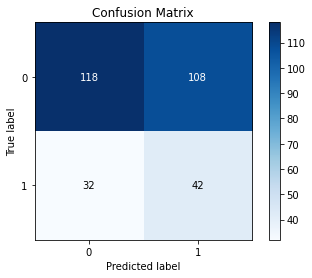

In [ ]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

After using G-Means tresholding, the confusion matrix show :

* The model predicted fraud and the insured actually fraud is 42 (True Positive)
* The model predicted not fraud and the insured actually fraud is 32 (False Negative)
* The model predicted fraud and the insured actually not fraud is 108 (False Positive)
* The model predicted not fraud and the insured actually not fraud is 118 (True Negative)

In [ ]:
# check f1-score
metrics.f1_score(y_test, new_pred_result)

0.37500000000000006

In [ ]:
# compare to the old f-1 score
metrics.f1_score(y_test, pred_result)

0.026315789473684213

In [ ]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['not fraud','fraud'], output_dict=True))

not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.786667   0.280000  0.533333    0.533333      0.661689
recall       0.522124   0.567568  0.533333    0.544846      0.533333
f1-score     0.627660   0.375000  0.533333    0.501330      0.565337
support    226.000000  74.000000  0.533333  300.000000    300.000000

In [ ]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not fraud','fraud'], output_dict=True))

not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.755034   0.500000  0.753333    0.627517      0.692125
recall       0.995575   0.013514  0.753333    0.504544      0.753333
f1-score     0.858779   0.026316  0.753333    0.442547      0.653438
support    226.000000  74.000000  0.753333  300.000000    300.000000

G-Means tresholding succeed to improve model F1 score from 26,31% to 37,5%

# Model Intepretation

### DALEX

In [ ]:
## initiate explainer for Log model
fraud_log_exp = dx.Explainer(log, X_train, y_train, label = "Log Interpretation")

Preparation of a new explainer is initiated

  -> data              : 700 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Log Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f71ffc73c20> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0902, mean = 0.247, max = 0.582
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.57, mean = -2.28e-05, max = 0.899
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
# visualize permutation feature importance for Log model
fraud_log_exp.model_parts().plot()

From the plot above, the higher variable is `vehicle_claim`

In [ ]:
# create partial dependence plot of Log model
fraud_log_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 11/11 [00:00<00:00, 66.49it/s]


### SHAP

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

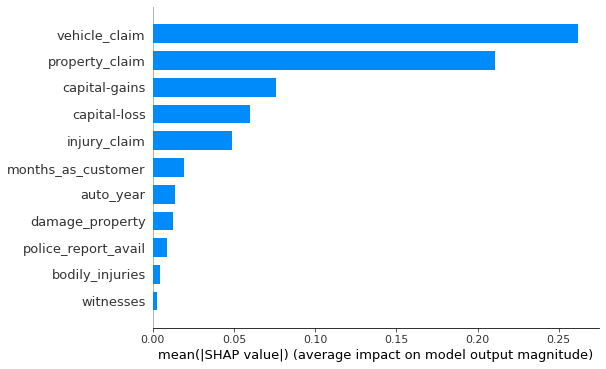

In [ ]:
# create SHAP Tree Explainer for Log model with| first 1000 rows of train data
log_shap_values = shap.LinearExplainer(log, masker=shap.maskers.Impute(data=X_train),feature_names=X_train.columns, algorithm="linear").shap_values(X_train[:1000])
# create SHAP summary plot with next 500 rows of train data
shap.summary_plot(log_shap_values, X_train[500:1000], plot_type='bar')

From the SHAP plot above, the higher importance variable is `vehicle_claim`

In [ ]:
# create SHAP Tree Explainer for log model with all rows of train data
log_explainer = shap.LinearExplainer(log, masker=shap.maskers.Impute(data=X_train),feature_names=X_train.columns, algorithm="linear")
# create shap values from log_explainer
log_shap_values = log_explainer.shap_values(X_train)

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# initiate javascript module
shap.initjs()

# explain prediction for the first row of X_train
shap.force_plot(log_explainer.expected_value, log_shap_values[1,:], X_train.iloc[1,:])

From the force plot above, we found that :
* The feature that have positive impact to the data is `vehicle_claim`, `capital-gains`, `injury_claim`.. And `vehicle_claim` is the strongest impact among them.
* The feature that have negative impact to the data is `property_claim`,`capital_loss`. And `property_claim` is the strongest impact among them.

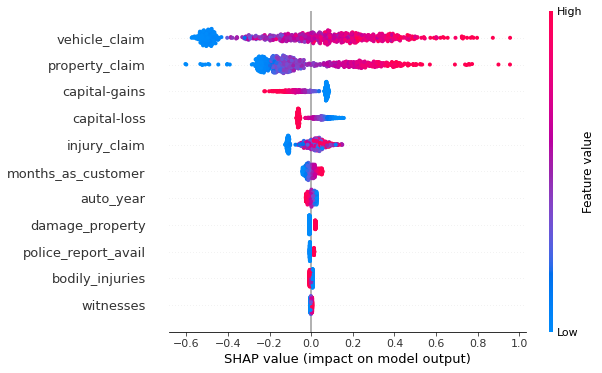

In [ ]:
# create SHAP summary plot to visualize impact distribution of 1000 rows of train data
shap.summary_plot(log_shap_values, X_train[0:1000])

In [ ]:
# initiate javascript module
shap.initjs()

# explain prediction for the first row of X_train
shap.force_plot(log_explainer.expected_value, log_shap_values[:1000,:], X_train.iloc[:1000,:])

### LIME

In [ ]:
# re-define Log model using .values
log = LogisticRegression(random_state=1000,fit_intercept=False)
# fit model to data
log.fit(X_train.values, y_train.values)

# predict
pred_result = log.predict(X_test.values)
pred_proba_result = log.predict_proba(X_test.values)

In [ ]:
# define Log explainer with lime module
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names = X_train.columns.tolist(),
    class_names = ['not fraud', 'fraud'],
    discretize_continuous = True,
    verbose = True
)

In [ ]:
X_test[insurance_fraud['policy_number'] == 527945]

months_as_customer  capital-gains  capital-loss  bodily_injuries  \
77                 319              0             0                0   

    witnesses  injury_claim  property_claim  vehicle_claim  auto_year  \
77          2         10860           10860          38010       2005   

    police_report_avail  damage_property  
77                    0                0

In [ ]:
#define some user
user_527945 = X_train.iloc[77]
user_235220 = X_train.iloc[97]
user_605100 = X_train.iloc[745]

In [ ]:
# explain Logistic prediction for user_527945
lime_explainer.explain_instance(user_527945, log.predict_proba).show_in_notebook(show_table=True)

Intercept 0.30731529984951467
Prediction_local [0.11136281]
Right: 0.0914010460548505


From the LIME explainer for the user_527945, we know that 5 important feature and their direction is :
* vehicle_claim - 0.15
* property_claim + 0.06
* injury_claim - 0.06
* capital_gain - 0.03
* capital_loss - 0.02

In [ ]:
# explain Log prediction for user_235220
lime_explainer.explain_instance(user_235220, log.predict_proba).show_in_notebook(show_table=True)

Intercept 0.28272101820728984
Prediction_local [0.1844558]
Right: 0.21208844603375404


From the LIME explainer for the user_235220, we know that 5 important feature and their direction is :
* vehicle_claim - 0.03
* property_claim - 0.02
* injury_claim - 0.02
* capital_gain - 0.02
* capital_loss + 0.01

In [ ]:
# explain Log prediction for user_605100
lime_explainer.explain_instance(user_605100, log.predict_proba).show_in_notebook(show_table=True)

Intercept 0.178773604129705
Prediction_local [0.44964092]
Right: 0.48037379834531635


From the LIME explainer for the user_605100, we know that 5 important feature and their direction is :
* vehicle_claim + 0.14
* property_claim + 0.07
* injury_claim + 0.03
* capital_gain + 0.02
* capital_loss + 0.01